# DIGG forum stat - 2

* [#1482](https://github.com/salgo60/DIGG-skuggbacklog/issues/1482)
* Denna Notebook [1482 2_DIGG forum](https://github.com/salgo60/DIGG-skuggbacklog/blob/master/Notebook/1482_2_DIGG_forum.ipynb)
   * se även Notebook [1478 DIGG forum](https://github.com/salgo60/DIGG-skuggbacklog/blob/master/Notebook/1478%20DIGG%20forum.ipynb)



In [1]:
import time

from datetime import datetime

now = datetime.now()
timestamp = now.timestamp()

start_time = time.time()
print("Start:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Start: 2025-12-04 18:08:09


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

# 1. läs in
df = pd.read_json("forum_data.json")

# Kolla snabbt
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tid              4063 non-null   int64 
 1   cid              4063 non-null   int64 
 2   slug             4063 non-null   object
 3   topic_title      4063 non-null   object
 4   topic_timestamp  4063 non-null   object
 5   pid              4063 non-null   int64 
 6   post_index       4063 non-null   int64 
 7   post_timestamp   4063 non-null   object
 8   uid              4063 non-null   int64 
 9   content_html     4063 non-null   object
 10  content_len      4063 non-null   int64 
 11  post_date        4063 non-null   int64 
 12  username         3225 non-null   object
 13  username_norm    4063 non-null   object
 14  is_digg          4063 non-null   bool  
 15  post_month       4063 non-null   object
dtypes: bool(1), int64(7), object(8)
memory usage: 480.2+ KB


(    tid  cid                                               slug  \
 0   282   23  282/hjälp-nosad-och-dataportalens-communityfor...   
 1  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 2  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 3  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 4  1059   23  1059/dataportal-se-har-stöd-för-sparql-queries...   
 
                                          topic_title  \
 0  Hjälp NOSAD och dataportalens communityforum a...   
 1  Dataportal.se har stöd för Sparql-queries, vis...   
 2  Dataportal.se har stöd för Sparql-queries, vis...   
 3  Dataportal.se har stöd för Sparql-queries, vis...   
 4  Dataportal.se har stöd för Sparql-queries, vis...   
 
             topic_timestamp   pid  post_index            post_timestamp   uid  \
 0  2022-01-11T17:30:39.030Z  1213           0  2022-01-11T17:30:39.030Z    62   
 1  2025-10-06T09:12:42.687Z  5304           0  2025-10-06T09:12:42.687Z   127   


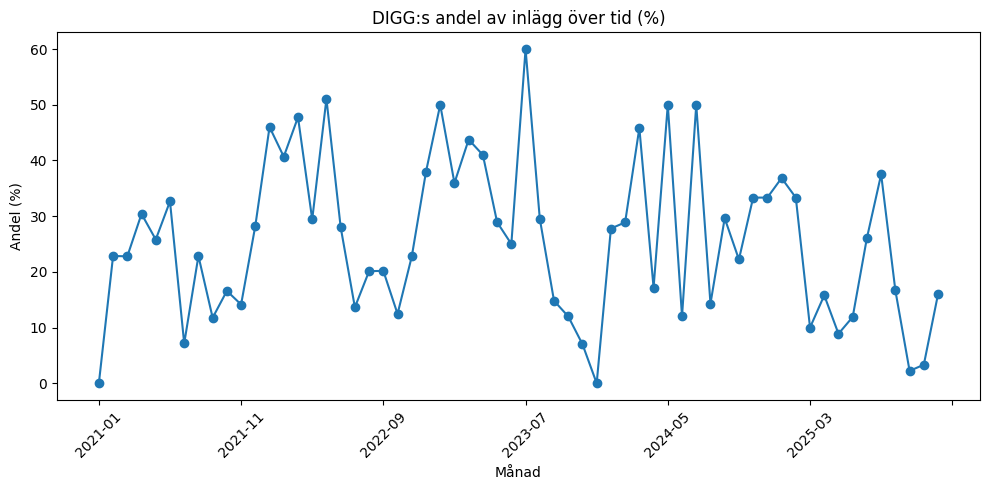

In [3]:
total_pm = df.groupby("post_month")["pid"].count()
digg_pm = df[df["is_digg"]].groupby("post_month")["pid"].count()

share = (digg_pm / total_pm * 100).fillna(0)

share.plot(marker="o")
plt.title("DIGG:s andel av inlägg över tid (%)")
plt.ylabel("Andel (%)")
plt.xlabel("Månad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/08_digg_andel_over_tid.png", dpi=200)
plt.show()

plt.close()



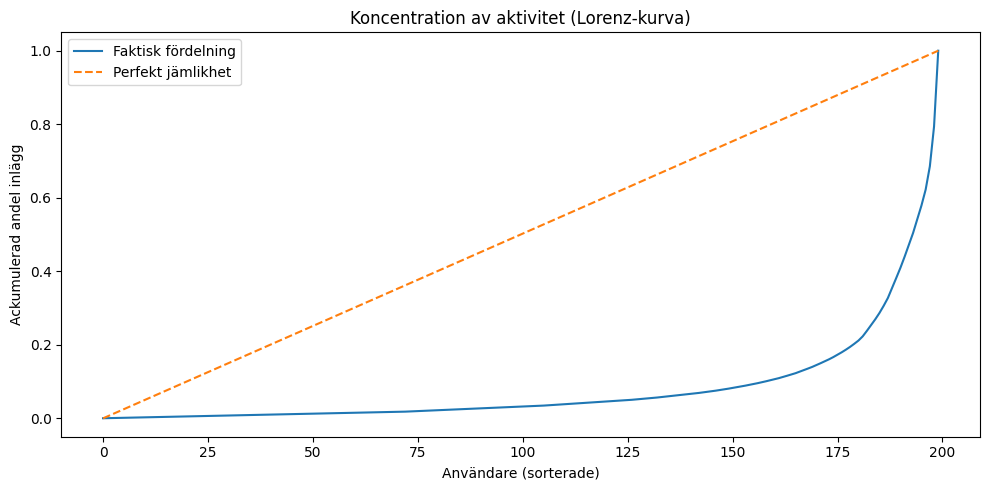

In [4]:
import numpy as np

posts_per_user = (
    df.groupby("username_norm")["pid"]
      .count()
      .sort_values()
)

cum_users = posts_per_user.cumsum() / posts_per_user.sum()

x = np.arange(len(cum_users))

plt.plot(x, cum_users.values, label="Faktisk fördelning")
plt.plot(x, x / x[-1], linestyle="--", label="Perfekt jämlikhet")

plt.title("Koncentration av aktivitet (Lorenz-kurva)")
plt.xlabel("Användare (sorterade)")
plt.ylabel("Ackumulerad andel inlägg")
plt.legend()
plt.tight_layout()
plt.savefig("figures/09_lorenz_koncentration.png", dpi=200)
plt.show()
plt.close()


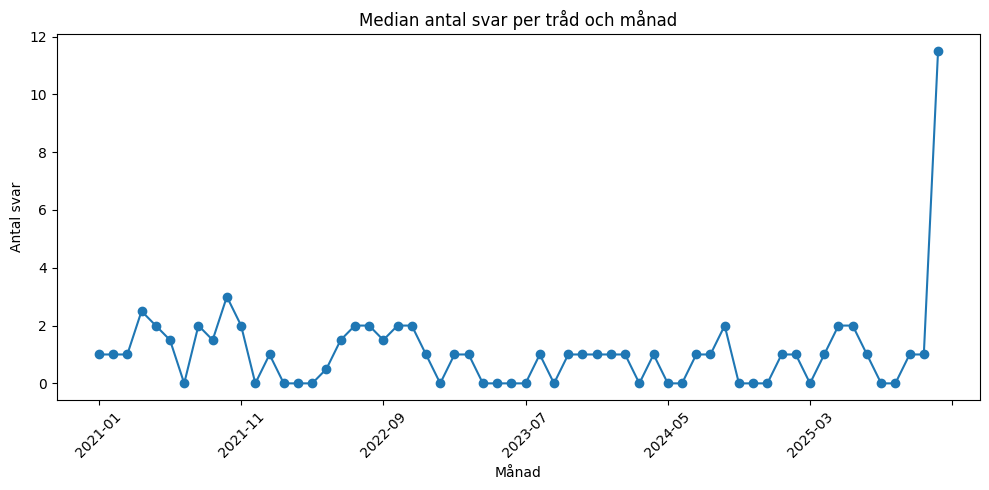

In [5]:
replies_per_topic = (
    df.groupby(["post_month", "tid"])["pid"]
      .count()
      .reset_index(name="posts")
)

replies_per_topic["replies"] = replies_per_topic["posts"] - 1

median_replies = (
    replies_per_topic
    .groupby("post_month")["replies"]
    .median()
)

median_replies.plot(marker="o")
plt.title("Median antal svar per tråd och månad")
plt.ylabel("Antal svar")
plt.xlabel("Månad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figures/10_median_svar_per_trad.png", dpi=200)
plt.show()
plt.close()


In [ ]:
 # End timer and calculate duration
end_time = time.time()
elapsed_time = end_time - start_time# Bygg audit-lager för den här etappen

# Print current date and total time
print("Date:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
minutes, seconds = divmod(elapsed_time, 60)
print("Total time elapsed: {:02.0f} minutes {:05.2f} seconds".format(minutes, seconds))
